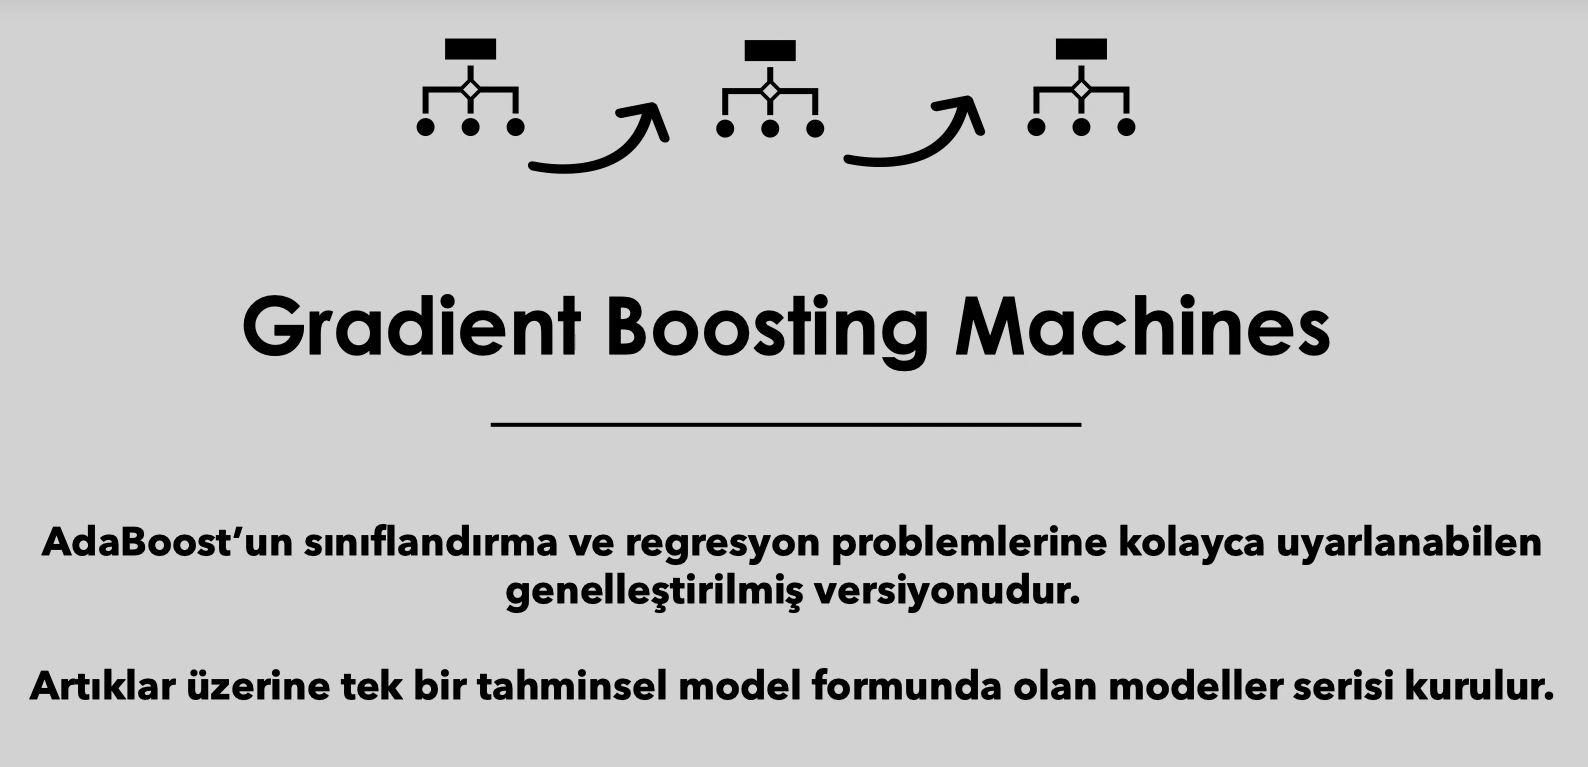

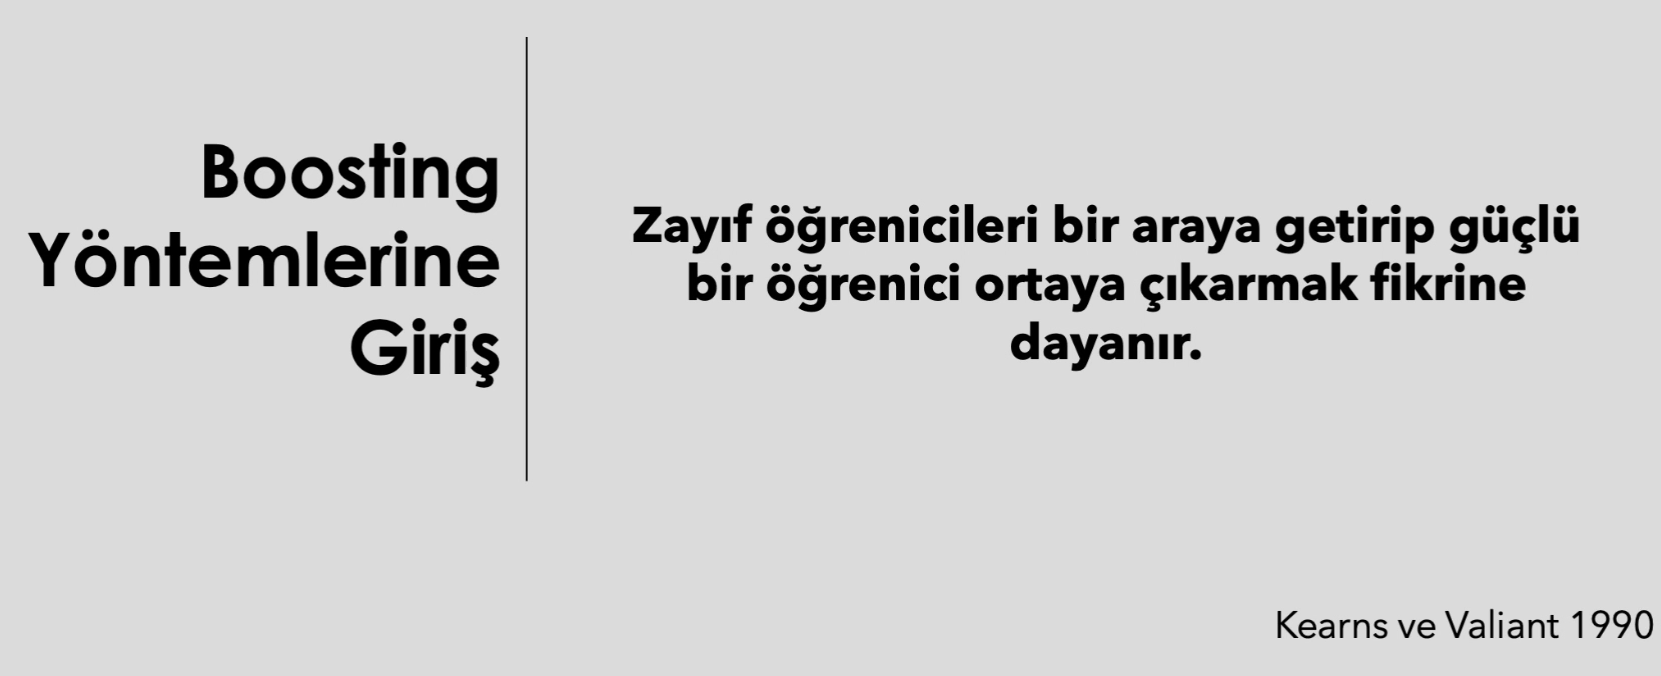

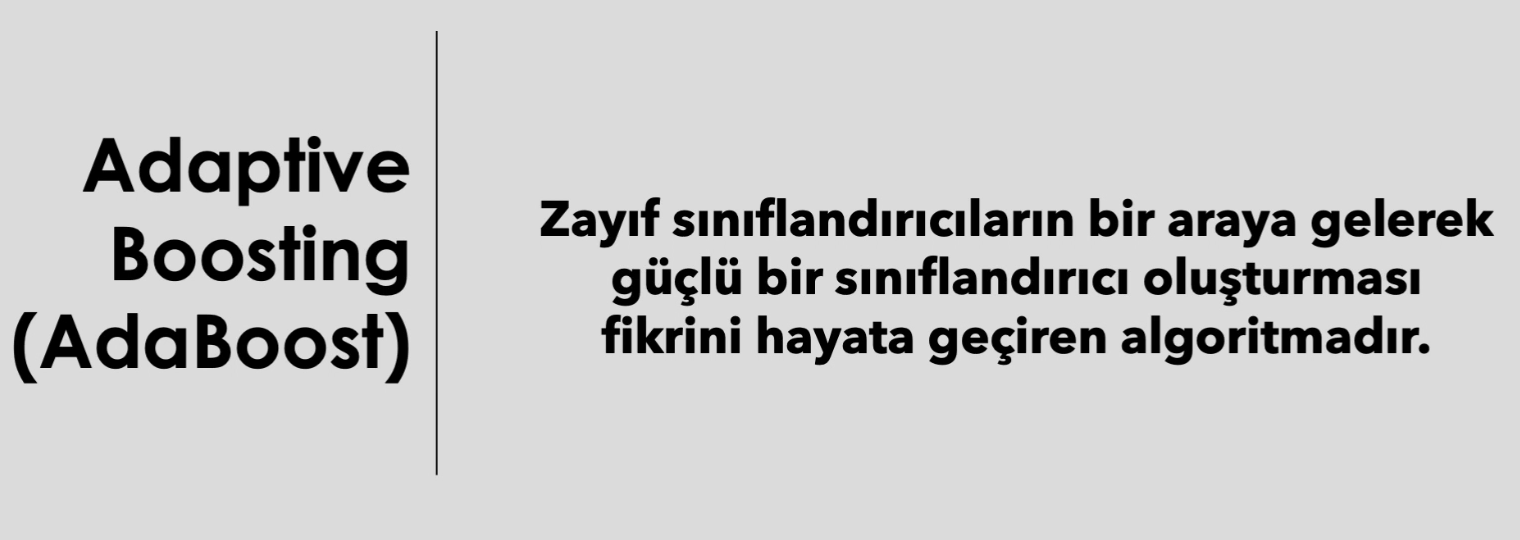

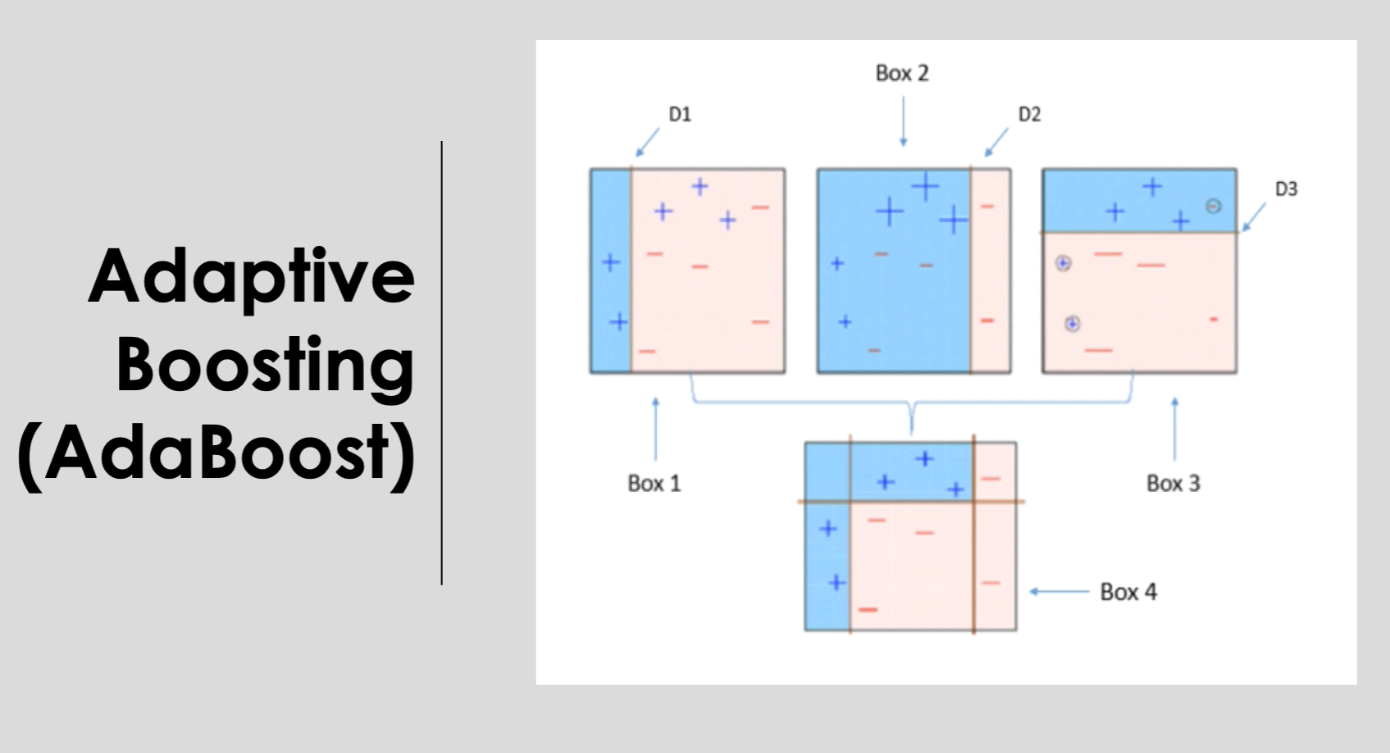

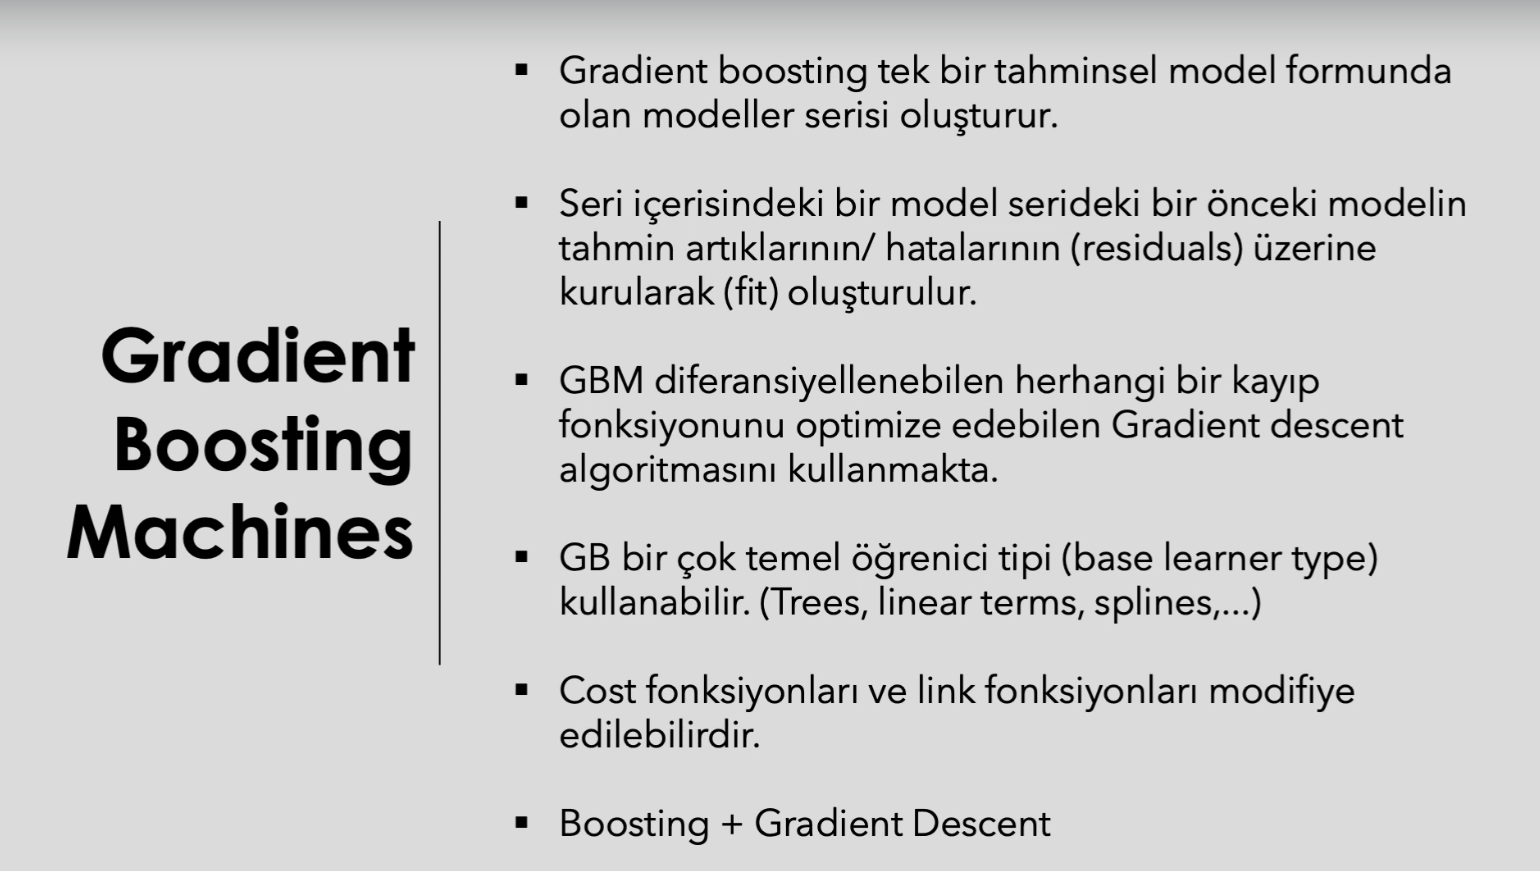

### Gradient Boosting Machines Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],axis=1).astype("float64")
X = pd.concat([X_ ,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , y, test_size=0.25, random_state=42)

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_Train, Y_Train).get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [5]:
y_pred = gbm_model.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

357.3062138469368

### Model Tuning

In [7]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8, 50, 100],
    'n_estimators': [200,500,1000,2000],
    'subsample': [1, 0.5, 0.75],
}

In [8]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs= -1, verbose=2)
gbm_cv_model.fit(X_Train, Y_Train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [9]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}

In [26]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=500,
                                      subsample=0.5)

gbm_tuned = gbm_tuned.fit(X_Train, Y_Train)

In [27]:
y_pred = gbm_tuned.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

329.4318583503483

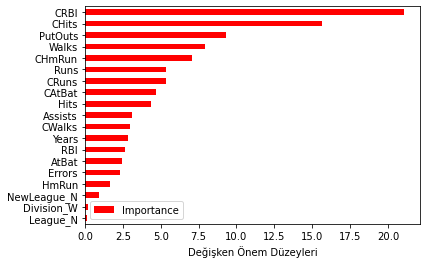

In [28]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                            index=X_Train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh", color="r")
plt.xlabel("Değişken Önem Düzeyleri");